In [1]:
import sys
sys.path.append('../src')

import network as nw
import torch
import generate_kvadraturen as gk
import bus
import road as rd
import traffic_lights as tl
import junction as jn
import numpy as np
import loading_json as load
import json
import FV_schemes as fv
import matplotlib.pyplot as plt

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [41]:
N = 2
L = 25
b = 4
pad = 2
dx = torch.tensor(1 / (N + 2*pad))
N_full = b * (N + 2 * pad)
j = torch.arange(0, N_full, 1)
x =  (j + 1/2) * dx
print(x)

tensor([0.0833, 0.2500, 0.4167, 0.5833, 0.7500, 0.9167, 1.0833, 1.2500, 1.4167,
        1.5833, 1.7500, 1.9167, 2.0833, 2.2500, 2.4167, 2.5833, 2.7500, 2.9167,
        3.0833, 3.2500, 3.4167, 3.5833, 3.7500, 3.9167])


NameError: name 'end' is not defined

In [45]:
print(torch.arange(dx, b, dx))

tensor([0.1667, 0.3333, 0.5000, 0.6667, 0.8333, 1.0000, 1.1667, 1.3333, 1.5000,
        1.6667, 1.8333, 2.0000, 2.1667, 2.3333, 2.5000, 2.6667, 2.8333, 3.0000,
        3.1667, 3.3333, 3.5000, 3.6667, 3.8333])


In [42]:
def activation(length):
    return 1. - torch.sigmoid(10/dx * (length - (b - 3/2 *dx)) - 5)

In [43]:
n = x.shape[0]
a = n/b
length = torch.linspace(-0.1,b+0.1,1000)
pos = a * length

prev = []
next = []
for p in pos:
    if p < 0:
        prev.append(0)
        next.append(0)
    elif p > n-1:
        prev.append(n-1)
        next.append(n-1)
    else:
        prev.append(np.floor(p))
        next.append(np.ceil(p))

activations = activation(length)

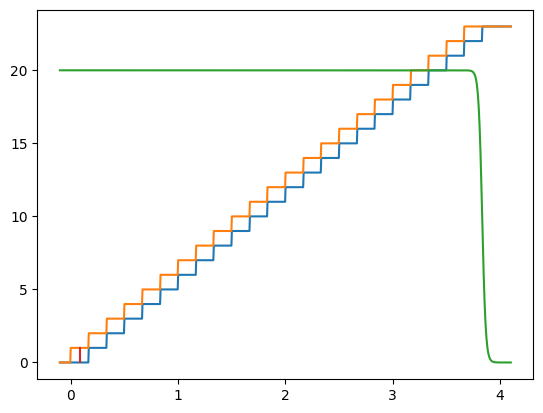

In [44]:
plt.plot(np.array(length), prev, label = "Closest cell to the left")
plt.plot(np.array(length), next, label = "Closest cell to the right")
plt.plot(np.array(length), np.array(activations)*20, label = "Activation")

plt.plot([dx/2, dx/2], [0, 1])
plt.show()

In [40]:
print(max(prev), min(prev))
print(max(next), min(next))

23 0
tensor(23.) 0


In [15]:
N = 2
L = 25
b = 4
pad = 2
dx = torch.tensor(1 / N)
N_internal = N*b
N_full = N_internal +  2*pad
j = torch.arange(-pad, N_internal + pad, 1)
x =  (j + 1/2) * dx
print(x * 25)

tensor([-18.7500,  -6.2500,   6.2500,  18.7500,  31.2500,  43.7500,  56.2500,
         68.7500,  81.2500,  93.7500, 106.2500, 118.7500])


In [14]:
N = 2
L = 25
b = 4
pad = 2
dx = torch.tensor(1 / (N + 2*pad))
N_full = b * (N + 2 * pad)
j = torch.arange(0, N_full, 1)
x =  (j + 1/2) * dx
print(x * 25)

tensor([ 2.0833,  6.2500, 10.4167, 14.5833, 18.7500, 22.9167, 27.0833, 31.2500,
        35.4167, 39.5833, 43.7500, 47.9167, 52.0833, 56.2500, 60.4167, 64.5833,
        68.7500, 72.9167, 77.0833, 81.2500, 85.4167, 89.5833, 93.7500, 97.9167])


In [6]:
a = torch.tensor([1.1674e-14, 2.3310e-14, 7.7402e-14, 2.1129e-13, 5.9720e-13, 1.6568e-12,
        4.5664e-12, 1.2451e-11, 3.3572e-11, 8.9414e-11, 2.3507e-10, 6.0956e-10,
        1.5577e-09, 3.9197e-09, 9.7028e-09, 2.3608e-08, 5.6414e-08, 1.3230e-07,
        3.0429e-07, 6.8594e-07, 1.5148e-06, 3.2756e-06, 6.9342e-06, 1.4368e-05,
        2.9139e-05, 5.7848e-05, 1.1244e-04, 2.1400e-04, 3.9893e-04, 7.2833e-04,
        1.3019e-03, 2.2767e-03, 3.8909e-03, 6.4878e-03, 1.0534e-02, 1.6626e-02,
        2.5477e-02, 3.7965e-02, 6.1649e-02, 8.3585e-02])
b = torch.tensor([3.7923e-23, 1.1377e-22, 7.6946e-22, 4.3895e-21, 2.5439e-20, 1.4732e-19,
        8.5303e-19, 4.9307e-18, 2.0214e-16, 3.6493e-15])

In [16]:
gamma = torch.tensor(1.0)
gamma_2 = torch.tensor(0.00006)

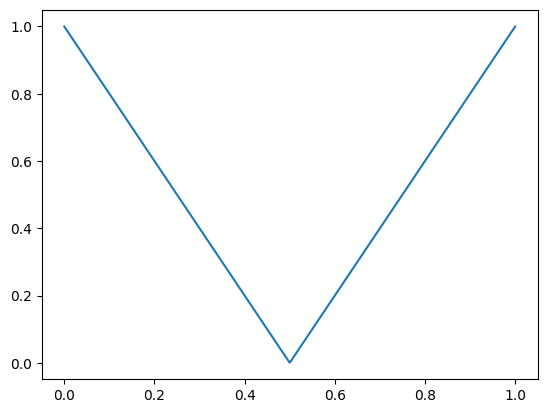

In [31]:
import matplotlib.pyplot as plt
rho = torch.linspace(0,1,1000)
plt.plot(rho, torch.abs(fv.d_flux(rho, -gamma)))

In [17]:
max_1 = torch.max(torch.abs(fv.d_flux(a, gamma)))
max_2 = torch.max(torch.abs(fv.d_flux(a, gamma_2)))
max_3 = torch.max(torch.abs(fv.d_flux(b, gamma)))
max_4 = torch.max(torch.abs(fv.d_flux(b, gamma_2)))

In [28]:
fv.d_flux(torch.tensor(3.79567e-23), gamma)

tensor(1.)

In [23]:
print(max_1, max_2, max_3, max_4)
print(max_1 > gamma)
print(max_2 > gamma_2)
print(max_3 > gamma)
print(max_4 > gamma_2)

tensor(1.) tensor(6.0000e-05) tensor(1.) tensor(6.0000e-05)
tensor(False)
tensor(False)
tensor(False)
tensor(False)


In [3]:
f = open("../optimization_results/network21_config21_restart_copy.json")
data = json.load(f)
f.close()
objectives = data["objectives"]

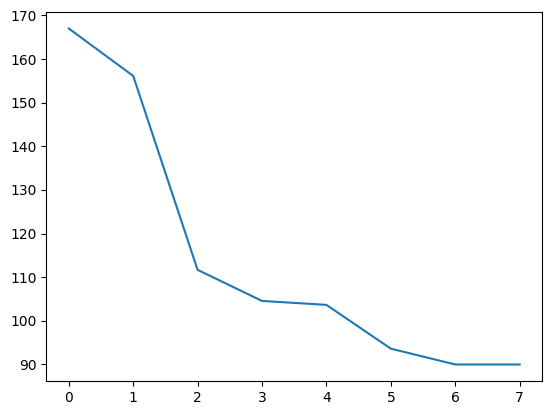

In [5]:
plt.plot([i for i in range(len(objectives))], objectives)

In [16]:
f = open("../kvadraturen_networks/with_e18/network_1.json")
data = json.load(f)
f.close()
T = data["T"]
T = 60
# T = 359#7.2502
# 7.700253486633301
N = data["N"]
speed_limits = data["speed_limits"] # Nested list
control_points = data["control_points"] # Nested list
cycle_times = data["cycle_times"] # Nested list

In [17]:
f = open("../kvadraturen_networks/with_e18/config_1_1.json")
config = json.load(f)
f.close()

In [18]:
# bus_network = gk.generate_kvadraturen_from_config(T, N, speed_limits, control_points, cycle_times,
#                                                   config)
bus_network_2 = gk.generate_kvadraturen_from_config_e18(T, N, speed_limits, control_points, cycle_times,
                                                  config, track_grad=True)

In [ ]:
 51.68757629394531, should wait for 29.876964569091797 seconds
Bus 19_fw1 reached bus stop 0 at time 59.50008773803711,


Bus 19_bw1 reached bus stop 0 at time 43.28125, should wait for 29.580432891845703 seconds

In [19]:
bus_network_2.solve_until_stop_reached()

Bus 19_bw1 reached bus stop 0 at time 51.68757629394531, should wait for 29.876964569091797 seconds
Calculating the gradient of the delay...


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [6]:
n_nodes = 0
for road in bus_network_2.roads:
    n_nodes += len(road.rho)
n_nodes

816

In [7]:
densities, queues, bus_lengths, delays = bus_network_2.solve_cons_law()

In [20]:
for road in bus_network_2.roads:
    print(road.dx, road.gamma[0], road.dx / (road.gamma[0]*road.max_dens))

tensor(0.1667) tensor(0.5556) tensor(0.1500)
tensor(0.1667) tensor(0.5556) tensor(0.1500)
tensor(0.1667) tensor(0.5556) tensor(0.1500)
tensor(0.1667) tensor(0.5556) tensor(0.1500)
tensor(0.1667) tensor(0.5556) tensor(0.1500)
tensor(0.1667) tensor(0.5556) tensor(0.1500)
tensor(0.1667) tensor(0.5556) tensor(0.1500)
tensor(0.1667) tensor(0.5556) tensor(0.1500)
tensor(0.1667) tensor(0.5556) tensor(0.1500)
tensor(0.1667) tensor(0.5556) tensor(0.1500)
tensor(0.1667) tensor(0.5556) tensor(0.1500)
tensor(0.1667) tensor(0.5556) tensor(0.1500)
tensor(0.1667) tensor(0.3333) tensor(0.5000)
tensor(0.1667) tensor(0.3333) tensor(0.5000)
tensor(0.1667) tensor(0.3333) tensor(0.5000)
tensor(0.1667) tensor(0.3333) tensor(0.5000)
tensor(0.1667) tensor(0.3333) tensor(0.5000)
tensor(0.1667) tensor(0.3333) tensor(0.5000)
tensor(0.1667) tensor(0.3333) tensor(0.5000)
tensor(0.1667) tensor(0.5556) tensor(0.3000)
tensor(0.1667) tensor(0.5556) tensor(0.3000)
tensor(0.1667) tensor(0.5556) tensor(0.3000)
tensor(0.1

In [17]:
times = np.array(list(densities[0].keys()))
max_dt = times[1] - times[0]
min_dt = times[1] - times[0]

for t_1, t_2 in zip(times[1:-1], times[2:]):
    max_dt = max(max_dt, t_2 - t_1)
    min_dt = min(min_dt, t_2 - t_1)
    print(min_dt, t_2 - t_1)
print(max_dt, min_dt)

0.10135133564472198 0.10135133564472198
0.10135133564472198 0.14993920922279358
0.10135133564472198 0.12579169869422913
0.10135133564472198 0.136732816696167
0.10135133564472198 0.13911503553390503
0.10135133564472198 0.12880480289459229
0.10135133564472198 0.142533540725708
0.10135133564472198 0.12247264385223389
0.10135133564472198 0.13805782794952393
0.10135133564472198 0.12284672260284424
0.10135133564472198 0.13021039962768555
0.10135133564472198 0.12374365329742432
0.10135133564472198 0.12451446056365967
0.10135133564472198 0.12299692630767822
0.10135133564472198 0.12135577201843262
0.10135133564472198 0.1208343505859375
0.10135133564472198 0.11915326118469238
0.10135133564472198 0.1184992790222168
0.10135133564472198 0.11724472045898438
0.10135133564472198 0.11639714241027832
0.10135133564472198 0.11543488502502441
0.10135133564472198 0.11455392837524414
0.10135133564472198 0.11372923851013184
0.10135133564472198 0.11290812492370605
0.10135133564472198 0.11215448379516602
0.1013

In [10]:
tot_delay = torch.tensor(0.0)
for i, delay in delays.items():
    for temp_delay in delay:
        tot_delay += temp_delay
print(tot_delay)

tensor(149.9103, grad_fn=<AddBackward0>)


In [11]:
tot_delay.backward()

In [12]:
speed_grads = bus_network_2.get_speed_limit_grads()
light_grads = bus_network_2.get_traffic_light_grads()

In [14]:
print(speed_grads)
print(light_grads)

[-0.26279041171073914, 0.0, -6.470071315765381, 0.0, -4.232998371124268, 0.0, 0.7485670447349548, 0.0, 0.023447610437870026, 0.0, -1.6903908252716064, 0.0, -0.02461836114525795, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015688667073845863, 0.0, 0.0, 0.0, 0.0]
[-7.715814717812464e-06, 0.0, 2.2451922632171772e-07, 0.0, -4.170651324297836e-10, -7.987401246651457e-44, 1.560581108783765e-10, 3.667758600523776e-41, -6.231999361006046e-10, 0.0, -2.8355149825354253e-11, 8.072880452975271e-42, 0.00223792833276093, -1.476784843143715e-37, 4.214200099994514e-10, 0.0, 5.0709397618475816e-12, 0.0, 2.206277294192205e-08, 0.0, 5.395620661374778e-08, 0.0, -0.902708113193512, -1.405978801195662e-40, -4.165966416280753e-08, 0.0]


In [5]:
# densities, queues, bus_lengths, delays, = bus_network_2.solve_cons_law()

Bus 19_bw1 reached bus stop 0 at time 45.10004425048828, should wait for 29.688169479370117 seconds
Bus 19_fw1 reached bus stop 0 at time 57.250003814697266, should wait for 29.90212631225586 seconds
Bus custom_bw1 reached bus stop 0 at time 103.94990539550781, should wait for 29.670072555541992 seconds
Bus m1_bw1 reached bus stop 0 at time 115.64982604980469, should wait for 29.624753952026367 seconds
Bus 19_bw1 reached bus stop 1 at time 171.34999084472656, should wait for 29.815980911254883 seconds
Bus m1_bw1 reached bus stop 1 at time 199.89993286132812, should wait for 29.978227615356445 seconds
Bus custom_bw1 reached bus stop 1 at time 221.34999084472656, should wait for 29.906797409057617 seconds
Bus m1_fw1 reached bus stop 0 at time 226.29995727539062, should wait for 29.569387435913086 seconds
Bus 19_bw1 reached bus stop 2 at time 244.0499725341797, should wait for 29.73847198486328 seconds
Bus 19_fw1 reached bus stop 1 at time 277.2001953125, should wait for 29.75788879394531

In [7]:
bus_network_2.solve_cons_law_with_restarting()

Bus 19_bw1 reached bus stop 0 at time 45.10004425048828, should wait for 29.688169479370117 seconds


AttributeError: 'list' object has no attribute 'detach'

In [11]:
for i, queue in queues.items():
    for t, queue_t in queue.items():
        if queue_t < 0:
            print(f"Queue into road {bus_network_2.roads[i].id} is negative at time {t}")

In [17]:
for i, road in enumerate(bus_network_2.roads):
    if road.id == "vs_mainline_3":
        print(road.rho)
    if road.id == "vs_mainline_2":
        print(road.rho)

tensor([0.9473, 0.9473, 0.9350, 0.9068, 0.8634, 0.8634])
tensor([1.0031, 1.0031, 0.9310, 0.9052, 0.8834, 0.8834])


In [18]:
for roundabout in bus_network_2.roundabouts:
    for jnc in roundabout.junctions:
        if jnc.mainline_out.id == "vs_mainline_3":
            print(jnc.mainline_in.id)
            if jnc.queue_junction:
                print(jnc.secondary_in.demand())

vs_mainline_2


TypeError: RoundaboutRoad.demand() missing 1 required positional argument: 't'

In [11]:
for j in bus_network_2.junctions:
    if "tollbod_1bw" in [road.id for road in j.roads]:
        print([road.id for road in j.roads])
        print(j.entering)

['v_strand_5fw', 'v_strand_6fw', 'v_strand_5bw', 'v_strand_6bw', 'tollbod_1bw']
[0, 3, 4]
['tollbod_1bw', 'festning_4fw', 'festning_5fw', 'festning_4bw', 'festning_5bw', 'tollbod_2fw', 'tollbod_2bw']
[1, 4, 6]


In [12]:
t = 7.2296
dt = 7.5655 - 7.2296

for i, road in enumerate(bus_network_2.roads):
    if road.id == "tollbod_1bw":
        print("tollbod_1bw", i)
        print(road.rho)
        print()
    if road.id == "festning_4fw":
        print("festning_4fw", i)
        print(road.rho)
        print()
    if road.id == "festning_5fw":
        print("festning_5fw", i)
        print(road.rho)
        print()
    if road.id == "festning_4bw":
        print("festning_4bw", i)
        print(road.rho)
        print()
    if road.id == "festning_5bw":
        print("festning_5bw", i)
        print(road.rho)
        print()
    if road.id == "tollbod_2fw":
        print("tollbod_2fw", i)
        print(road.rho)
        print()
    if road.id == "tollbod_2bw":
        print("tollbod_2bw", i)
        print(road.rho)
        print()

tollbod_2fw 14
tensor([0.1266, 0.1266, 0.0948, 0.0710, 0.0815, 0.1276, 0.1805, 0.1962, 0.1994,
        0.1999, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000])

tollbod_1bw 15
tensor([0.0045, 0.0045, 0.0349, 0.0561, 0.0801, 0.1292, 0.1810, 0.1962, 0.1994,
        0.1999, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2020, 0.3953, 0.8637,
        0.8637])

tollbod_2bw 16
tensor([0.1936, 0.1936, 0.1975, 0.1996, 0.1999, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2015, 0.3603, 0.8219,
        0.8219])

festning_4fw 28
tensor([4.4994e-06, 4.4994e-06, 6.1323e-05, 3.4918e-04, 1.7102e-03, 6.4879e-03,
        2.1397e-02, 5.9751e-02, 1.3139e-01, 1.8306e-01, 1.9656e-01, 1.9904e-01,
     

In [13]:
slowdown_factors = [torch.ones(road.N_internal+1) for road in bus_network_2.roads]
slowdown_indexes = []
for bus in bus_network_2.busses:
    # slowdown_factors, slowing_idx = self.update_position_of_bus(bus, dt.clone(), t.clone(), slowdown_factors)
    slowdown_factors, slowing_idx = bus_network_2.update_position_of_bus(bus, dt, t, slowdown_factors)
    if slowing_idx is not None:
        slowdown_indexes.append(slowing_idx)


In [14]:
print(slowing_idx) # No busses on roads with bus stops!

None


In [34]:
def calculate_upper_bound(jnc, actual_fluxes, crossing_connections, i, max_flux_in,
                              demand_ij, epsilon=0.1):
        '''
        Calculates the upper bound determined by the flux on the crossing connections
        Upper bound is never lower than epsilon*max_flux_in[i], i.e. a small percentage of the 
        maximum flux, right now default is at 10%
        In the general case, a quadrature rule is used to calculate the combined contribution of crossing connections
        '''
        cloned_fluxes = actual_fluxes.clone()
        if len(crossing_connections) == 1:
            print("Only one crossing connection")
            # Only one crossing connection - no integral needed
            xi = 1 - cloned_fluxes[crossing_connections[0][0],crossing_connections[0][1]]/max_flux_in[crossing_connections[0][0]]

        elif len(crossing_connections) == 2:
            print("Two crossing connections")
            # Two crossing connections - might be able to use explicit solution for integral
            xi = jnc.calculate_xi_two_crossing(cloned_fluxes, crossing_connections, max_flux_in)
        else:
            print("More than two crossing connections")
            # Need to use quadrature rule
            xi = jnc.calculate_xi_n_crossing(cloned_fluxes, crossing_connections, max_flux_in)

        # xi should be somewhere in the interval [0,1]
        print(f"xi equal to {xi}")
        epsilon = epsilon * max_flux_in[i]
        return torch.minimum(demand_ij, epsilon + xi*(max_flux_in[i] - epsilon))

In [37]:
for j in bus_network_2.junctions:
    if "festning_5bw" in [road.id for road in j.roads] and "tollbod_1bw" in [road.id for road in j.roads]:
        print([road.id for road in j.roads])
        print(j.entering)
        print(j.leaving)
        fluxes_in, fluxes_out = j.divide_flux_right_of_way(t)

        print("Going through the steps to calculate the fluxes:")

        rho_in = [road.rho[-road.pad].clone() for road in j.road_in]
        rho_out = [road.rho[road.pad].clone() for road in j.road_out]

        gamma_in = [road.gamma[road.idx] for road in j.road_in]
        max_flux_in = [fv.fmax(gamma) for gamma in gamma_in]
        max_flux_scaled = [fv.fmax(gamma)*road.max_dens for gamma,road in zip(gamma_in, j.road_in)]
        
        print(f"Incoming densities: {rho_in}")
        print(f"Outgoing densities: {rho_out}")
        print(f"Incoming gamma parameters: {gamma_in}")
        print(f"Maximum incoming fluxes: {max_flux_in}")
        print(f"Maximum incoming fluxes scaled: {max_flux_scaled}")

        activation = j.calculate_activation(t)

        print(f"\nActivation: {activation}")

        print(f"\nDistribution: {j.distribution}")

        demand = j.calculate_demand(activation)
        print(f"\nDemand: {demand}")

        print(f"Incoming demands: {[torch.sum(demand[i]) for i in range(3)]}")

        gamma_out = [road.gamma[road.idx] for road in j.road_out]
        max_flux_scaled_out = [fv.fmax(gamma)*road.max_dens for gamma,road in zip(gamma_out, j.road_out)]
        capacities = [road.supply() for road in j.road_out]

        actual_capacities = [road.max_dens * fv.S(road.rho[0].clone(), road.gamma[road.idx]) for road in j.road_out]

        print(f"\nCapacities: {capacities}")
        # print(f"\nActual capacities: {actual_capacities}")

        # print(f"\nMaximum fluxes in: {max_flux_scaled_out}")

        priorities = j.calculate_priority_params(rho_in)

        print(f"Priorities: {priorities}\n")

        print(f"Crossing connections: {j.crossing_connections}")


        

        # fluxes_in, fluxes_out = j.calculate_fluxes(demand, capacities, priorities, max_flux_in)
        # print(f"Incoming fluxes: {fluxes_in}")    
        # print(f"Outgoing fluxes: {fluxes_out}")


        actual_fluxes = torch.zeros((j.n, j.m))

        assigned_fluxes = []
        upper_bounds = demand.clone()


        for n_crossing in range(j.max_crossing_connections + 1):
            # Go through all connections in an increasing order of n_crossings starting with 0
            for i in range(j.n):
                # Go through every incoming road
                for l in range(j.m):
                    if len(j.crossing_connections[i][l]) == n_crossing and (i,l) not in assigned_fluxes:
                        if len(j.crossing_connections[i][l]) > 0:
                            # There are some crossing connections, and so an upper bound needs to be calculated
                            # Not actually necessary to take in the entire actual_fluxes. Could instead use only the elements of
                            # actual_fluxes corresponding to crossing connections with higher priority
                            upper_bounds[i,l] = calculate_upper_bound(j, actual_fluxes, 
                                                                           j.crossing_connections[i][l],
                                                                           i, max_flux_scaled, demand[i,l])
                            print(f"demand on connection ({i},{l}) : {demand[i,l]}")
                            print(f"upper bound on connection ({i},{l}) : {upper_bounds[i,l]}\n")

                        mask = torch.ones(j.n, dtype=torch.bool)
                        mask[i] = False
                        upper_bound_sum = torch.sum(upper_bounds[mask,l])

                        interior_max = capacities[l] - upper_bound_sum
                        supply_max = torch.max(priorities[i][l]*capacities[l], interior_max)

                        if interior_max < 0:
                            print(f"Interior max on connection ({i},{l}) is negative!\n")
                        if supply_max < 0:
                            print(f"Supply max on connection ({i},{l}) is negative!\n")
                            
                        # print(f"connection ({i},{l})")
                        # print(f"Interior max: {interior_max}")
                        # print(f"Supply max: {supply_max}")
                        # print()

                        actual_fluxes[i,l] = torch.minimum(upper_bounds[i,l].clone(), supply_max)
                        if actual_fluxes[i,l] < 0:
                            print(f"Flux on connection ({i},{l}) is negative!\n")

                        assigned_fluxes.append((i,l))
        print(actual_fluxes)



['tollbod_1bw', 'festning_4fw', 'festning_5fw', 'festning_4bw', 'festning_5bw', 'tollbod_2fw', 'tollbod_2bw']
[1, 4, 6]
[0, 2, 3, 5]
Going through the steps to calculate the fluxes:
Incoming densities: [tensor(0.5775), tensor(0.2372), tensor(0.8219)]
Outgoing densities: [tensor(0.0349), tensor(0.1537), tensor(0.1500), tensor(0.0948)]
Incoming gamma parameters: [tensor(0.5556), tensor(0.5556), tensor(0.3333)]
Maximum incoming fluxes: [tensor(0.1389), tensor(0.1389), tensor(0.0833)]
Maximum incoming fluxes scaled: [tensor(0.2778), tensor(0.2778), tensor(0.0833)]

Activation: tensor([[9.0288e-01, 9.0288e-01, 9.0288e-01, 9.0288e-01],
        [9.0288e-01, 9.0288e-01, 9.0288e-01, 9.0288e-01],
        [5.4848e-28, 5.4848e-28, 5.4848e-28, 5.4848e-28]])

Distribution: tensor([[0.1000, 0.8000, 0.0000, 0.1000],
        [0.1000, 0.0000, 0.8000, 0.1000],
        [0.5000, 0.2500, 0.2500, 0.0000]])

Demand: tensor([[2.5080e-02, 2.0064e-01, 0.0000e+00, 2.5080e-02],
        [1.8154e-02, 0.0000e+00, 1.4

['tollbod_1bw', 'festning_4fw', 'festning_5fw', 'festning_4bw', 'festning_5bw', 'tollbod_2fw', 'tollbod_2bw']


In [35]:
# for j in bus_network_2.junctions:
#     if "v_strand_1fw" in [road.id for road in j.roads]:
#         print([road.id for road in j.roads])

In [34]:
# for roundabout in bus_network_2.roundabouts:
#     for j in roundabout.junctions:
#         ids = []
#         ids.append(j.mainline_in.id)
#         ids.append(j.mainline_out.id)
#         if not j.queue_junction:
#             ids.append(j.secondary_in.id)
#             ids.append(j.secondary_out.id)
        
#         if "v_strand_1fw" in ids:
#             print(ids)
            

In [33]:
# for i, road in enumerate(bus_network_2.roads):
#     if road.id == "vs_mainline_4":
#         print(f"vs_mainline_4 at index {i}")
#     elif road.id == "vs_mainline_3":
#         print(f"vs_mainline_3 at index {i}")
#     elif road.id == "v_strand_1bw":
#         print(f"v_strand_1bw at index {i}")
#     elif road.id == "v_strand_1fw":
#         print(f"v_strand_1fw at index {i}")

In [32]:
# for t, val in densities[0].items():
#     # if torch.max(val) > 1 or torch.min(val) < 0:
#     #     print(t, val)
#     #     break
#     if 100 < t < 102:
#         print(f"t = {t}")
#         print(f"Densities on road ")
#         print(t, val)

In [6]:
t = 300
dt = torch.tensor(1111)
for road in bus_network_2.roads:
    # print(road.max_dt(), torch.max(road.rho), torch.min(road.rho))
    if torch.min(road.rho) < 0:
        print(f"Error with road {road.id}!")
        print(road.rho)
    
    if torch.max(road.rho) > 1:
        print(f"Error with road {road.id}!")
        print(road.rho)

    print()

Error with road v_strand_1fw!
tensor([-1.2661e-05, -1.2661e-05,  1.3341e-05,  6.2487e-05,  1.1063e-04,
         1.6180e-04,  2.4159e-04,  3.8709e-04,  6.4351e-04,  1.0682e-03,
         1.8809e-03,  4.4849e-02,  6.0390e-01,  9.8816e-01,  1.0000e+00,
         1.0000e+00])
Error with road v_strand_1fw!
tensor([-1.2661e-05, -1.2661e-05,  1.3341e-05,  6.2487e-05,  1.1063e-04,
         1.6180e-04,  2.4159e-04,  3.8709e-04,  6.4351e-04,  1.0682e-03,
         1.8809e-03,  4.4849e-02,  6.0390e-01,  9.8816e-01,  1.0000e+00,
         1.0000e+00])










































Error with road vs_mainline_4!
tensor([0.5854, 0.5854, 0.9539, 0.9998, 1.0000, 1.0000])






















In [5]:
# Test junction distribution on e18:
# Find the timestep:
t = torch.tensor(0.0)
controlpoint = bus_network_2.T

for road in bus_network_2.roads:
    new_time = road.update_index(t)
    if new_time == -1:
        new_time = bus_network_2.T
    # print(f"Road {road.id}")
    # print(f"Maximal allowed timestep: {road.max_dt()}")
    # print(f"Densities on road: {road.rho}")
    # print()
controlpoint = min(controlpoint, new_time)
for j in bus_network_2.junctions:
    controlpoint= min(controlpoint, j.get_next_control_point(t))

dt = controlpoint - t
            
for road in bus_network_2.roads:
    dt = torch.min(dt, road.max_dt())

print(dt)

tensor(0.7031, grad_fn=<MinimumBackward0>)


In [6]:
slowdown_factors = [torch.ones(road.N_internal+1) for road in bus_network_2.roads]
slowdown_indexes = []
for bus in bus_network_2.busses:
    # slowdown_factors, slowing_idx = self.update_position_of_bus(bus, dt.clone(), t.clone(), slowdown_factors)
    slowdown_factors, slowing_idx = bus_network_2.update_position_of_bus(bus, dt, t, slowdown_factors)
    if slowing_idx is not None:
        slowdown_indexes.append(slowing_idx)

In [7]:
import FV_schemes as fv

In [41]:
for j in bus_network_2.junctions:
    if "e18_3bw" in [road.id for road in j.roads]:
        print([road.id for road in j.roads])
        print(j.leaving)
        print(j.distribution)
        print(j.duty_to_gw)


        rho_in = [road.rho[-road.pad].clone() for road in j.road_in]
        gamma_in = [road.gamma[road.idx] for road in j.road_in]
        max_flux_in = [fv.fmax(gamma) for gamma in gamma_in]

        print(rho_in)
        print(gamma_in)
        print(max_flux_in)

        activation = j.calculate_activation(t)

        print(activation)

        demand = j.calculate_demand(activation)

        print(demand)
        for l in range(3):
            print(torch.sum(demand[l]))

        capacities = [road.supply() for road in j.road_out]
        print(capacities)

        priorities = j.calculate_priority_params(rho_in)

        print(priorities)

        fluxes_in, fluxes_out = j.calculate_fluxes(demand, capacities, priorities, max_flux_in)

        print(f"Incoming fluxes: {fluxes_in}")
        print(f"Outgoing fluxes: {fluxes_out}")

        break

['e18_2fw', 'e18_2bw', 'e18_3fw', 'e18_3bw', 'e18_w_outfw', 'e18_w_outbw']
[1, 2, 5]
tensor([[0.0000, 0.9000, 0.1000],
        [0.8000, 0.0000, 0.2000],
        [0.3000, 0.7000, 0.0000]])
True
[tensor(0.7000), tensor(0.7000), tensor(0.5000)]
[tensor(0.8889, grad_fn=<DivBackward0>), tensor(0.8889, grad_fn=<DivBackward0>), tensor(0.6667, grad_fn=<DivBackward0>)]
[tensor(0.2222, grad_fn=<MulBackward0>), tensor(0.2222, grad_fn=<MulBackward0>), tensor(0.1667, grad_fn=<MulBackward0>)]
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.0000, 0.4000, 0.0444],
        [0.3556, 0.0000, 0.0889],
        [0.0500, 0.1167, 0.0000]], grad_fn=<CopySlices>)
tensor(0.4444, grad_fn=<SumBackward0>)
tensor(0.4444, grad_fn=<SumBackward0>)
tensor(0.1667, grad_fn=<SumBackward0>)
[tensor(0.3733, grad_fn=<MulBackward0>), tensor(0.3733, grad_fn=<MulBackward0>), tensor(0.1667, grad_fn=<MulBackward0>)]
[[0, tensor(0.5858), tensor(0.3175)], [tensor(0.8974), 0, tensor(0.6825)], [tensor(0.1

In [45]:
bus_network_2.roads[0].dx

tensor(0.5000)

In [8]:
for J in bus_network_2.junctions:
    # Apply boundary conditions to all junctions
    #J.apply_bc_wo_opt(dt, t)
    J.apply_bc(dt,t)

In [9]:
for road in bus_network_2.roads:
    print(f"road {road.id} has distribution {road.rho}")

road v_strand_1fw has distribution tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.3242, 0.3242],
       grad_fn=<CopySlices>)
road v_strand_2fw has distribution tensor([0.0756, 0.0756, 0.2000, 0.2000, 0.2000, 0.2000, 0.3250, 0.3250],
       grad_fn=<CopySlices>)
road v_strand_3fw has distribution tensor([0.0750, 0.0750, 0.2000, 0.2000, 0.2000, 0.2000, 0.3250, 0.3250],
       grad_fn=<CopySlices>)
road v_strand_4fw has distribution tensor([0.0750, 0.0750, 0.2000, 0.2000, 0.2000, 0.2000, 0.3250, 0.3250],
       grad_fn=<CopySlices>)
road v_strand_5fw has distribution tensor([0.0750, 0.0750, 0.2000, 0.2000, 0.2000, 0.2000, 0.3242, 0.3242],
       grad_fn=<CopySlices>)
road v_strand_6fw has distribution tensor([0.0758, 0.0758, 0.2000, 0.2000, 0.2000, 0.2000, 0.3250, 0.3250],
       grad_fn=<CopySlices>)
road v_strand_1bw has distribution tensor([0.0756, 0.0756, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,

In [15]:
bus_network = gk.generate_kvadraturen_w_e18_w_busses(T = 5, track_grad=True)

In [16]:
bus_network.solve_cons_law()

({0: {0: tensor([0.1667, 0.1667, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
           0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2816, 0.2816],
          grad_fn=<CopySlices>),
   tensor(0.4687, grad_fn=<AddBackward0>): tensor([0.1513, 0.1513, 0.1897, 0.1991, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
           0.2000, 0.2000, 0.2000, 0.2000, 0.2013, 0.3362, 0.3362],
          grad_fn=<CopySlices>),
   tensor(0.7933, grad_fn=<AddBackward0>): tensor([0.1391, 0.1391, 0.1801, 0.1974, 0.1998, 0.2000, 0.2000, 0.2000, 0.2000,
           0.2000, 0.2000, 0.2000, 0.2000, 0.2036, 0.3912, 0.3912],
          grad_fn=<CopySlices>),
   tensor(1.1368, grad_fn=<AddBackward0>): tensor([0.1304, 0.1304, 0.1681, 0.1943, 0.1994, 0.2000, 0.2000, 0.2000, 0.2000,
           0.2000, 0.2000, 0.2000, 0.2000, 0.2078, 0.4422, 0.4422],
          grad_fn=<CopySlices>),
   tensor(1.4792, grad_fn=<AddBackward0>): tensor([0.1242, 0.1242, 0.1566, 0.1890, 0.1985, 0.1999, 0.2000, 0.2000, 0.2000,
           0.20

In [17]:
bus_network_2.solve_cons_law()

({0: {0: tensor([0.1500, 0.1500, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
           0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.3216, 0.3216],
          grad_fn=<CopySlices>),
   tensor(0.7031, grad_fn=<AddBackward0>): tensor([0.1414, 0.1414, 0.1776, 0.1965, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
           0.2000, 0.2000, 0.2000, 0.2000, 0.2034, 0.3626, 0.3626],
          grad_fn=<CopySlices>),
   tensor(0.9531, grad_fn=<AddBackward0>): tensor([0.1356, 0.1356, 0.1695, 0.1942, 0.1996, 0.2000, 0.2000, 0.2000, 0.2000,
           0.2000, 0.2000, 0.2000, 0.2000, 0.2056, 0.3956, 0.3956],
          grad_fn=<CopySlices>),
   tensor(1.1635, grad_fn=<AddBackward0>): tensor([0.1313, 0.1313, 0.1626, 0.1916, 0.1991, 0.1999, 0.2000, 0.2000, 0.2000,
           0.2000, 0.2000, 0.2000, 0.2000, 0.2081, 0.4238, 0.4238],
          grad_fn=<CopySlices>),
   tensor(1.3512, grad_fn=<AddBackward0>): tensor([0.1280, 0.1280, 0.1566, 0.1887, 0.1985, 0.1999, 0.2000, 0.2000, 0.2000,
           0.20

In [18]:
for road in bus_network.roads:
    print(f"Road {road.id}:")
    print(f"Speed limits: {road.Vmax}")
    print(f"Gamma: {road.gamma}")
    print(f"cell size: {road.dx}")
    print(f"Initial distribution: {road.rho}")
    print()

Road v_strand_1fw:
Speed limits: [tensor(13.8889, requires_grad=True)]
Gamma: [tensor(0.5556, grad_fn=<DivBackward0>)]
cell size: 0.5
Initial distribution: tensor([0.1236, 0.1236, 0.1205, 0.1227, 0.1353, 0.1637, 0.1891, 0.1974, 0.1995,
        0.1999, 0.2000, 0.2000, 0.2004, 0.2565, 0.5415, 0.5415],
       grad_fn=<DifferentiableGraphBackward>)

Road v_strand_2fw:
Speed limits: [tensor(13.8889, requires_grad=True)]
Gamma: [tensor(0.5556, grad_fn=<DivBackward0>)]
cell size: 0.5
Initial distribution: tensor([0.1395, 0.1395, 0.0984, 0.0604, 0.0620, 0.2304, 0.7873, 0.7873],
       grad_fn=<DifferentiableGraphBackward>)

Road v_strand_3fw:
Speed limits: [tensor(13.8889, requires_grad=True)]
Gamma: [tensor(0.5556, grad_fn=<DivBackward0>)]
cell size: 0.5
Initial distribution: tensor([3.0503e-04, 3.0503e-04, 1.4590e-03, 6.5793e-03, 2.5532e-02, 2.0916e-01,
        7.8113e-01, 7.8113e-01], grad_fn=<DifferentiableGraphBackward>)

Road v_strand_4fw:
Speed limits: [tensor(13.8889, requires_grad=Tru

In [19]:
for road in bus_network_2.roads:
    print(f"Road {road.id}:")
    print(f"Speed limits: {road.Vmax}")
    print(f"Gamma: {road.gamma}")
    print(f"cell size: {road.dx}")
    print(f"Initial distribution: {road.rho}")
    print()

Road v_strand_1fw:
Speed limits: [tensor(13.8889, requires_grad=True)]
Gamma: [tensor(0.5556, grad_fn=<DivBackward0>)]
cell size: 0.5
Initial distribution: tensor([0.1249, 0.1249, 0.1214, 0.1229, 0.1345, 0.1616, 0.1877, 0.1968, 0.1993,
        0.1999, 0.2000, 0.2000, 0.2005, 0.2618, 0.5635, 0.5635],
       grad_fn=<DifferentiableGraphBackward>)

Road v_strand_2fw:
Speed limits: [tensor(13.8889, requires_grad=True)]
Gamma: [tensor(0.5556, grad_fn=<DivBackward0>)]
cell size: 0.5
Initial distribution: tensor([0.1261, 0.1261, 0.0832, 0.0505, 0.0524, 0.1842, 0.7421, 0.7421],
       grad_fn=<DifferentiableGraphBackward>)

Road v_strand_3fw:
Speed limits: [tensor(13.8889, requires_grad=True)]
Gamma: [tensor(0.5556, grad_fn=<DivBackward0>)]
cell size: 0.5
Initial distribution: tensor([4.9806e-04, 4.9806e-04, 1.6096e-03, 6.3166e-03, 2.2896e-02, 1.6817e-01,
        7.3290e-01, 7.3290e-01], grad_fn=<DifferentiableGraphBackward>)

Road v_strand_4fw:
Speed limits: [tensor(13.8889, requires_grad=Tru

In [1]:
import torch

In [4]:
a = torch.tensor(0.2)
print(float(a))

0.20000000298023224


In [11]:
_, _, _, delays = bus_network.solve_cons_law()

Bus 19_bw1 reached bus stop 0 at time 38.51508712768555, should wait for 29.718582153320312 seconds


In [17]:
for road in bus_network.roads:
    print(f"Max timestep on road {road.id}: {road.max_dt()}")
    print()

Max timestep on road v_strand_1fw: 0.7073220014572144

Max timestep on road v_strand_2fw: 0.45723411440849304

Max timestep on road v_strand_3fw: 0.5376384854316711

Max timestep on road v_strand_4fw: 0.4656830132007599

Max timestep on road v_strand_5fw: 0.4699220657348633

Max timestep on road v_strand_6fw: 0.45150765776634216

Max timestep on road v_strand_1bw: 0.4500071108341217

Max timestep on road v_strand_2bw: 0.46935194730758667

Max timestep on road v_strand_3bw: 0.46093612909317017

Max timestep on road v_strand_4bw: 0.45032286643981934

Max timestep on road v_strand_5bw: 0.45000025629997253

Max timestep on road v_strand_6bw: 0.44999998807907104

Max timestep on road h_w_1: 1.500003695487976

Max timestep on road h_w_2: 1.5794020891189575

Max timestep on road tollbod_2fw: 1.503743052482605

Max timestep on road tollbod_1bw: 1.5000009536743164

Max timestep on road tollbod_2bw: 1.500001072883606

Max timestep on road elvegata_fw: 1.504984974861145

Max timestep on road elve

In [12]:
objective = torch.tensor(0.0)
for i in range(len(delays)):
    for delay in delays[i]:
        objective += delay
print(objective)

tensor(34.5901, grad_fn=<AddBackward0>)


In [13]:
objective.backward()

In [3]:
speed_grad = bus_network.get_speed_limit_grads()
time_grad = bus_network.get_traffic_light_grads()

In [4]:
len(speed_grad)

14

In [8]:
tensors = []
ids_added = []
for road in bus_network.roads:
    # print(f"Looking at road {road.id}")
    if road.id[-2:] in ["fw", "bw"]:
        if road.id[:-3] not in ids_added:
            ids_added.append(road.id[:-3])
            for v in road.Vmax:
                # print(f"Adding {road.id}")
                # tensors.append(v.grad)
                if v.grad is not None:
                    tensors.append(v.grad.item())
                else:
                    tensors.append(0.0)


    else:
        if road.id[:-1] not in ids_added:
            ids_added.append(road.id[:-1])
            for v in road.Vmax:
                # print(f"Adding {road.id}")
                # tensors.append(v.grad)
                if v.grad is not None:
                    tensors.append(v.grad.item())
                else:
                    tensors.append(0.0)

In [9]:
print(ids_added)

['v_strand_', 'h_w_', 'tollbod_', 'elvegata', 'dronning_', 'festning_', 'lundsbro', 'vs_mainline_', 'fn_mainline_', 'e18_', 'e18_w_', 'e18_e_']


In [5]:
# bus_network = gk.generate_kvadraturen_roundabout_w_params(T, N, speed_limits, control_points, cycle_times,
#                                                           track_grad=False)

In [6]:
# T = 30
# bus_network = gk.generate_kvadraturen_w_bus(T, track_grad=False)

In [ ]:
torch.set_

In [4]:
# with torch.autograd.set_detect_anomaly(True):
#     densities, queues, bus_lengths, bus_delays = bus_network.solve_cons_law()
bus_network = gk.generate_kvadraturen_w_e18_w_busses(T = 50, track_grad=True)

densities, queues, bus_lengths, bus_delays = bus_network.solve_cons_law()#bus_network.solve_cons_law_restarting()

Bus 19_bw1 reached bus stop 0 at time 38.51508712768555, should wait for 29.718582153320312 seconds


In [8]:
objective = torch.tensor(0.0)
for i in range(len(bus_delays)):
    for delay in bus_delays[i]:
        objective += delay
print(objective)

tensor(34.5901, grad_fn=<AddBackward0>)


In [9]:
objective.backward()

In [10]:
speed_grads = bus_network.get_speed_limit_grads()
time_grads = bus_network.get_traffic_light_grads()

In [12]:
time_grads

[tensor(3.7601e-31),
 tensor(0.),
 tensor(-1.9204e-31),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(1.1181e-17),
 tensor(0.),
 tensor(1.0158e-27),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(8.8202e-21),
 tensor(0.),
 tensor(-5.5244e-35),
 tensor(0.),
 tensor(0.),
 tensor(0.)]

In [2]:
network_file = "../kvadraturen_networks/without_e18/network_1.json"

f = open(network_file)
data = json.load(f)
f.close()
T = data["T"]
N = data["N"]
speed_limits = data["speed_limits"] # Nested list
lower_speed_limit = data["lower_speed_limit"] # Float
upper_speed_limit = data["upper_speed_limit"] # Float
control_points = data["control_points"] # Nested list
cycle_times = data["cycle_times"] # Nested list
lower_cycle_time = data["lower_cycle_time"] # Float
upper_cycle_time = data["upper_cycle_time"]


n_speeds = []
n_cycles = []
speed_idx = 0
for speeds in speed_limits:
    n_speeds.append(len(speeds))
    speed_idx += len(speeds)
last_speed_idx = speed_idx

for cycles in cycle_times:
    n_cycles.append(len(cycles))

control_points = control_points



config_file = "../kvadraturen_networks/without_e18/config_1_1.json"
f = open(config_file)
data = json.load(f)
f.close()

config = data

In [3]:
def get_speeds_cycles_from_params(params):
    idx = 0
    speed_limits = []
    cycle_times = []

    for i in range(len(n_speeds)):
        speed_limits.append([])
        for j in range(n_speeds[i]):
            speed_limits[i].append(params[idx])
            idx += 1

    for i in range(len(n_cycles)):
        cycle_times.append([])
        for j in range(n_cycles[i]):
            cycle_times[i].append(params[idx])
            idx += 1

    return speed_limits, cycle_times

In [4]:
def create_network_from_params(T, N, params, track_grad = False):
    speed_limits, cycle_times = get_speeds_cycles_from_params(params)
    # bus_network = gk.generate_kvadraturen_roundabout_w_params(T, N, speed_limits, control_points, cycle_times,
    #                                                           track_grad=track_grad)
    # bus_network = gk.generate_kvadraturen_from_config_e18(T, N, speed_limits, control_points,
    #                                                       cycle_times, config, track_grad=track_grad)
    bus_network = gk.generate_kvadraturen_from_config(T, N, speed_limits, control_points,
                                                          cycle_times, config, track_grad=track_grad)
    return bus_network

In [5]:
params = torch.tensor([ 50.,  30.,  30.,  30.,  50.,  50.,  50., 
         50.,  50.,  50., 100.,  50., 100.,  50., 100.,  50., 100.,  50., 100.,
         70.,  70.,  80.,  80.,  50., 100.,  60., 120.,  60., 120.,  60., 120.,
         80., 100.,  80., 100.])


In [6]:
bus_network = create_network_from_params(T, N, params, track_grad=False)

In [6]:
T

50

In [7]:
def run_simulation(params, T, N):
    bus_network = create_network_from_params(T, N, params, track_grad=False)

    _, _, _, delays = bus_network.solve_cons_law()
    print(delays)
    objective = torch.tensor(0.0)
    for i in range(len(delays)):
        for delay in delays[i]:
            objective += delay
    return objective

In [8]:
from torch.autograd.functional import jacobian
temp_run_simulation = lambda x : run_simulation(x, T, N)
gradient = jacobian(temp_run_simulation, params, vectorize=True, strategy="forward-mode")
# from torch.func import jacfwd
# gradient = jacfwd(run_simulation)(params, T, N)

Bus 2 reached bus stop 0 at time 38.80003356933594, should wait for 29.56218147277832 seconds


RuntimeError: Batching rule not implemented for aten::item. We could not generate a fallback.

In [9]:
gradient

tensor([-5.0285e-06,  0.0000e+00, -7.8064e-01, -1.8090e-01,  1.0566e-02,
        -1.7466e-04, -1.7743e-01,  0.0000e+00, -3.3026e-10, -1.1453e-19,
         0.0000e+00, -9.2566e-12,  0.0000e+00, -3.1043e-11,  0.0000e+00,
        -6.3247e-11,  0.0000e+00, -1.6028e-17,  0.0000e+00, -2.7034e-19,
         0.0000e+00,  1.3128e-39,  0.0000e+00,  6.0187e-18,  0.0000e+00,
         3.0071e-27,  0.0000e+00, -2.9066e-27,  0.0000e+00,  3.2680e-25,
         0.0000e+00, -2.4264e-22,  0.0000e+00, -7.8654e-22,  0.0000e+00],
       dtype=torch.float64)

In [5]:
bus_network = gk.generate_kvadraturen_w_e18_w_busses(T = 60, track_grad=True)

densities, queues, bus_lengths, bus_delays = bus_network.solve_cons_law()

Bus 19_bw1 reached bus stop 0 at time 38.51508712768555, should wait for 29.718582153320312 seconds
Bus 19_fw1 reached bus stop 0 at time 54.567848205566406, should wait for 29.867393493652344 seconds


In [6]:
print(bus_delays)

{0: [tensor(51.7791, grad_fn=<AddBackward0>), tensor(0.), tensor(0.), tensor(0.)], 1: [tensor(34.5901, grad_fn=<AddBackward0>), tensor(0.), tensor(0.), tensor(0.)], 2: [tensor(0.), tensor(0.)], 3: [tensor(0.), tensor(0.)], 4: [tensor(0.), tensor(0.)], 5: [tensor(0.), tensor(0.), tensor(0.)]}


In [6]:
final_time = list(densities[0])[-1]
for i, road in enumerate(bus_network.roads):
    print(f"Road {road.id} has a queue length {queues[i][final_time]}")

Road v_strand_1fw has a queue length 0.0
Road v_strand_2fw has a queue length 0.0
Road v_strand_3fw has a queue length 0.0
Road v_strand_4fw has a queue length 0.0
Road v_strand_5fw has a queue length 0.0
Road v_strand_6fw has a queue length 0.0
Road v_strand_1bw has a queue length 0.0
Road v_strand_2bw has a queue length 0.0
Road v_strand_3bw has a queue length 0.0
Road v_strand_4bw has a queue length 0.0
Road v_strand_5bw has a queue length 0.0
Road v_strand_6bw has a queue length 0.0
Road h_w_1 has a queue length 0.210833340883255
Road h_w_2 has a queue length 0.0
Road tollbod_2fw has a queue length 0.0
Road tollbod_1bw has a queue length 0.0
Road tollbod_2bw has a queue length 0.0
Road elvegata_fw has a queue length 0.0
Road elvegata_bw has a queue length 0.0
Road dronning_1fw has a queue length 0.0
Road dronning_2fw has a queue length 0.0
Road dronning_3fw has a queue length 0.0
Road dronning_1bw has a queue length 0.0
Road dronning_2bw has a queue length 0.0
Road dronning_3bw has

In [10]:
for i, lengths in bus_lengths.items():
    print("-----------------------------------------------")
    print(f"Lengths for bus {i+1}")
    for t, l in lengths.items():
        print(f"t =  {t}, l = {l}")
    print("-----------------------------------------------")
    print()

-----------------------------------------------
Lengths for bus 1
t =  0, l = 0.0
t =  0.4687500298023224, l = 6.523437976837158
t =  0.7970176339149475, l = 11.076778411865234
t =  1.1005127429962158, l = 15.248891830444336
t =  1.393972635269165, l = 19.266063690185547
t =  1.6826436519622803, l = 23.226852416992188
t =  1.968900203704834, l = 27.152116775512695
t =  2.253920793533325, l = 30.928743362426758
t =  2.5383081436157227, l = 34.70039367675781
t =  2.8223721981048584, l = 38.46962356567383
t =  3.106271982192993, l = 42.206504821777344
t =  3.3900885581970215, l = 45.93730926513672
t =  3.673863410949707, l = 49.675514221191406
t =  3.9576172828674316, l = 53.422691345214844
t =  4.241360664367676, l = 58.013916015625
t =  4.52509880065918, l = 62.60088348388672
t =  4.808834075927734, l = 67.18533325195312
t =  5.0, l = 70.26654815673828
t =  5.283733367919922, l = 74.841064453125
t =  5.5674662590026855, l = 79.41905212402344
t =  5.851199150085449, l = 83.98477172851562

Testing why bus 1 stops at 23.23 metres for such a long time:

23.23 metres is at the end of vs_mainline_3 and vs_mainline_4

In [7]:
bus_1 = bus_network.busses[0]
bus_1.get_road_position(bus_network)

(41, tensor(0.9291), 42)

In [9]:
print(bus_network.roads[42].id)

vs_mainline_4


In [10]:
bus_1.get_road_id()

('vs_mainline_3', tensor(23.2269), 'vs_mainline_4')

In [20]:
t = torch.tensor(25.0)
dt = torch.tensor(0.3)
slowdown_factors = [torch.ones(road.N_internal+1) for road in bus_network.roads]
slowdown_factors, slowing_idx = bus_network.update_position_of_bus(bus_1, dt, t, slowdown_factors)

In [21]:
slowing_idx

41

In [22]:
print(bus_network.roads[41].rho)
print(bus_network.roads[41].rho)


tensor([0.1748, 0.1748, 0.1745, 0.1739, 0.1730, 0.1730])
tensor([0.1748, 0.1748, 0.1745, 0.1739, 0.1730, 0.1730])


In [23]:
print(slowing_idx)
for i, road in enumerate(bus_network.roads):
    if i == slowing_idx:
        print(f"Slowdown factors on road {road.id}:")
        print(slowdown_factors[i])
        print()


41
Slowdown factors on road vs_mainline_3:
tensor([1., 1., 1.])



Something looks strange here - investigate what happens by manually doing the steps in update_position_of_bus:

In [29]:
road_id, length, next_id = bus_1.get_road_id()
print(road_id, length, next_id)
print(road_id == "")

vs_mainline_3 tensor(23.2269) vs_mainline_4
False


In [32]:
i, road = bus_network.get_road(road_id)
print(i, road.id)
slowing_idx = None

41 vs_mainline_3


In [34]:
slowdown_, bus_started_ = bus_1.get_slowdown_factor(slowdown_factors[41].clone(), road_id,
                                                      length, road)
print(slowdown_, bus_started_)

tensor([1., 1., 1.]) True


There are no stops on this road, so no slowing down should happen!

In [40]:
print(bus_started_)
slowing_idx = 41

True


In [43]:
# Looking for opposite lane:
opposite_road = None
if road.id[-2:] == "fw" or road.id[-2:] == "bw":
    if i > 0: 
        if bus_network.roads[i-1].id[:-2] == road.id[:-2]:
            opposite_road = bus_network.roads[i-1]
    if i < len(bus_network.roads)-1:
        if bus_network.roads[i+1].id[:-2] == road.id[:-2]:
            opposite_road = bus_network.roads[i+1]
print(opposite_road)

None


As expected there are no opposing lanes...

In [44]:
print(opposite_road is not None)

False


Slowdown factors calculated correctly...

In [47]:
new_length = length / road.L
new_length # length travelled on road
speed = road.get_speed_updated(new_length, dt) * road.L
speed # Speed in m/s on road


tensor(11.5015)

Speed looks okay

In [53]:
activation = torch.tensor(1.0)
if next_id == "" or length + speed * dt < road.L*road.b:
    print("Bus not close to junction")
else:
    print("Bus close to junction")

Bus close to junction


In [55]:
for j in bus_network.junctions:
    check, activ_ = j.get_activation(t, road_id, next_id)
    print(check, activ_)
    if check:
        activation = activ_
        break

print(activation)

False 0.0
False 0.0
False 0.0
False 0.0
False 0.0
False 0.0
False 0.0
False 0.0
False 0.0
False 0.0
False 0.0
False 0.0
False 0.0
False 0.0
tensor(1.)


In [58]:
for road in j.roads:
    print(road.id)

festning_3fw
festning_4fw
festning_3bw
festning_4bw


In [59]:
if activation >= 0.5:
    # Bus can cross junction
    speed = torch.minimum(speed, j.get_speed(t, road_id, next_id))
    print(speed)
print(road_id, next_id)

tensor(4.8247e-26)
vs_mainline_3 vs_mainline_4


In [62]:
idx_1 = -1
idx_2 = -1
for i, road in enumerate(j.road_in):
    if road.id == road_id:
        idx_1 = i
        break
for i, road in enumerate(j.road_out):
    if road.id == next_id:
        idx_2 = i
        break
print(idx_1, idx_2)

-1 -1


testing outgoing speed on lundsbro - looks to be way too fast

In [36]:
import json
print("Loading results...")
f = open("../results/kvadraturen_500_temp_opt_internal.json")
data = json.load(f)
f.close()
densities = data[0]
queues = data[1]
bus_lengths = data[2]
bus_delays = data[3]

Loading results...


In [44]:
lengths = bus_lengths['2']

In [45]:
for t, length in lengths.items():
    print(f"Length at time {t}: {length}")

Length at time 0.0: 0.0
Length at time 0.4687500298023224: 0.0
Length at time 0.7970176339149475: 0.0
Length at time 1.1005127429962158: 0.0
Length at time 1.393972635269165: 0.0
Length at time 1.6826436519622803: 0.0
Length at time 1.968900203704834: 0.0
Length at time 2.253920793533325: 0.0
Length at time 2.5383081436157227: 0.0
Length at time 2.8223721981048584: 0.0
Length at time 3.106271982192993: 0.0
Length at time 3.3900885581970215: 0.0
Length at time 3.673863410949707: 0.0
Length at time 3.9576172828674316: 0.0
Length at time 4.241360664367676: 0.0
Length at time 4.52509880065918: 0.0
Length at time 4.808834075927734: 0.0
Length at time 5.0: 0.0
Length at time 5.283733367919922: 0.0
Length at time 5.5674662590026855: 0.0
Length at time 5.851199150085449: 0.0
Length at time 6.134932041168213: 0.0
Length at time 6.418664932250977: 0.0
Length at time 6.70239782333374: 0.0
Length at time 6.986130714416504: 0.0
Length at time 7.269863128662109: 0.0
Length at time 7.553595542907715:

In [25]:
for t, length in lengths.items():
    print(f"Length at time {t}: {length}")

Length at time 0.0: 0.0
Length at time 0.4687500298023224: 6.523437976837158
Length at time 0.7970176339149475: 11.076778411865234
Length at time 1.1005127429962158: 15.248891830444336
Length at time 1.393972635269165: 19.266063690185547
Length at time 1.6826436519622803: 23.226852416992188
Length at time 1.968900203704834: 23.226852416992188
Length at time 2.253920793533325: 23.226852416992188
Length at time 2.5383081436157227: 23.226852416992188
Length at time 2.8223721981048584: 23.226852416992188
Length at time 3.106271982192993: 23.226852416992188
Length at time 3.3900885581970215: 23.226852416992188
Length at time 3.673863410949707: 23.226852416992188
Length at time 3.9576172828674316: 23.226852416992188
Length at time 4.241360664367676: 23.226852416992188
Length at time 4.52509880065918: 23.226852416992188
Length at time 4.808834075927734: 23.226852416992188
Length at time 5.0: 23.226852416992188
Length at time 5.283733367919922: 23.226852416992188
Length at time 5.5674662590026

In [7]:
objective_fnc = torch.tensor(0.0)
for i in range(len(bus_delays)):
    for j in range(len(bus_delays[i])):
        objective_fnc = objective_fnc + bus_delays[i][j]
print(objective_fnc)

tensor(40.0934, grad_fn=<AddBackward0>)


In [8]:
objective_fnc.backward()
speed_limits = bus_network.get_speed_limit_grads()
traffic_lights = bus_network.get_traffic_light_grads()

In [ ]:
59.24377647  80.          80.          65.87917085  57.49176426
  79.26315085  80.          50.13192135  28.42084207  49.62954308
  99.99005596  50.2654001   99.99631058  50.03542892  99.99824851
  50.29059791  99.99172916  49.99478611  99.99989917  70.12932961
  69.99999647  79.33517426  79.80488551  49.68705362  99.98898422
  59.79298455 119.88902983  60.76570415 119.98281134  59.87032718
 119.99935821  79.77154544  99.98828991  79.96011442  98.09888928

In [9]:
speed_limits[4]

0.04000745341181755

In [5]:
times = list(densities[0].keys())
objective_fnc += densities[0][times[-1]][4]

In [5]:
objective_fnc.backward()

In [6]:
bus_network.get_speed_limit_grads()

[tensor(0.0009),
 tensor(3.3250e-25),
 tensor(-1.3810),
 tensor(-0.6805),
 tensor(0.0400),
 tensor(0.0084),
 tensor(-0.6718),
 tensor(1.4207e-20),
 tensor(-1.2328e-09)]

In [7]:
bus_network.get_traffic_light_grads()

[tensor(-2.7601e-24),
 tensor(0.),
 tensor(-4.7805e-21),
 tensor(0.),
 tensor(-1.5719e-20),
 tensor(0.),
 tensor(-4.5082e-20),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(-4.8610e-20),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(1.1688e-22),
 tensor(0.),
 tensor(3.1627e-27),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(7.5706e-21),
 tensor(0.),
 tensor(-9.7813e-19),
 tensor(0.),
 tensor(-3.1493e-18),
 tensor(0.)]

#### Testing speed of bus coming into junction

In [21]:
# Interesting bus: first bus
test_bus = bus_network.busses[0]
test_bus_lengths = bus_lengths[0]

# Interesting roads:
incoming = bus_network.roads[28]
outgoing = bus_network.roads[14]
in_densities = densities[28]
out_densities = densities[14]

# Interesting junction:
jnc = bus_network.junctions[7]

# Interesting time period: 
start_time = torch.tensor(344)
end_time = torch.tensor(366)

In [29]:
# First check densities on roads in the interesting interval:
times = list(in_densities.keys())
for i, t in enumerate(times):
    if start_time < t < end_time:
        next_t = times[i+1]
        dt = next_t - T
        tot_length = test_bus_lengths[t]
        _, length = test_bus.get_road_id_at_length(tot_length)
        new_length = length / incoming.L
        prev, next, pos = incoming.get_node_at_length(new_length)

        print(f"t = {t}")
        print(f"Bus has travelled {tot_length} meters, {length} meters on current road")
        print(f"This is equivalent to internal nodes {prev}, and {next}, with pos {pos}")
        print(f"Incoming densities: ")
        print(in_densities[t])
        print(f"Outgoing densities: ")
        print(out_densities[t])
        print()

t = 344.200927734375
Bus has travelled 644.899169921875 meters, 94.899169921875 meters on current road
This is equivalent to internal nodes 7.0, and 8.0, with pos 7.091933727264404
Incoming densities: 
tensor([2.3842e-07, 2.3842e-07, 2.3842e-07, 2.3842e-07, 2.3859e-07, 2.3994e-07,
        2.4461e-07, 2.5648e-07, 2.6570e-07, 4.3250e-06, 6.9844e-03, 3.0192e-01,
        9.2697e-01, 9.9957e-01, 1.0000e+00, 1.0000e+00], grad_fn=<CopySlices>)
Outgoing densities: 
tensor([1.3129e-10, 1.3129e-10, 4.7617e-11, 1.5330e-11, 4.4689e-12, 1.3288e-12,
        3.9349e-13, 1.1662e-13, 3.4558e-14, 1.0241e-14, 3.0348e-15, 8.9931e-16,
        2.6650e-16, 7.8972e-17, 2.3402e-17, 6.9349e-18, 2.0550e-18, 6.0904e-19,
        1.8058e-19, 5.3407e-20, 1.5374e-20, 4.5237e-21, 2.8527e-21, 5.1930e-21,
        2.0519e-20, 9.4007e-20, 6.3478e-19, 6.3478e-19], grad_fn=<CopySlices>)

t = 344.65093994140625
Bus has travelled 651.149169921875 meters, 101.149169921875 meters on current road
This is equivalent to internal n

In [34]:
# Check when bus
first_bus_lengths = bus_lengths['0']
first_bus = bus_network.busses[0]
times = first_bus_lengths.keys()
for t in times:
    length = first_bus_lengths[t]
    if length > 700:
        print(f"t = {t}, length = {length}")
        print(f"Road id: {first_bus.get_road_id_at_length(length)}")
        break

t = 365.0, length = 700.0109252929688
Road id: ('tollbod_2fw', 0.01092529296875)


In [4]:
# 27.550016403198242, should wait for 29.835927963256836 seconds
# 344.65093994140625 - 365 - Check calculated speeds...

In [4]:
print(bus_delays)

{0: [tensor(202.3306, grad_fn=<AddBackward0>), tensor(199.9107, grad_fn=<AddBackward0>), tensor(242.2030, grad_fn=<AddBackward0>), tensor(205.3318, grad_fn=<AddBackward0>)], 1: [tensor(23.8124, grad_fn=<AddBackward0>), tensor(5.1012, grad_fn=<AddBackward0>), tensor(0., grad_fn=<AddBackward0>), tensor(119.0426, grad_fn=<AddBackward0>)], 2: [tensor(0.), tensor(0.), tensor(0.), tensor(0.)], 3: [tensor(0., grad_fn=<AddBackward0>), tensor(0., grad_fn=<AddBackward0>), tensor(0., grad_fn=<AddBackward0>), tensor(0.)]}


In [5]:
objective_fnc = torch.tensor(0.0)
for i in range(len(bus_delays)):
    for j in range(len(bus_delays[i])):
        objective_fnc = objective_fnc + bus_delays[i][j]
print(objective_fnc)

tensor(997.7323, grad_fn=<AddBackward0>)


In [6]:
objective_fnc.backward()

In [ ]:
adgHSKKL

NameError: name 'adgHSKKL' is not defined

In [ ]:
rho = torch.tensor([0.1, 0.1, 0.2, 0.45, 0.35, 0.234, 0.124, 0.64, 0.24])
slowdown = torch.tensor([0.1, 0.5, 0.7, 0.2, 0.6, 0.1])
pad = 2
n_internal = len(rho) - 2*pad
for i in range(n_internal+1):
    print(rho[-pad-i], rho[-pad-i-1])

internal = torch.flip(rho[pad-1:-pad+1],dims=[0])
avg = (internal[1:] + internal[:-1]) / 2
torch.ones(6) - (1. - slowdown) * (1. - avg) / 2

tensor(0.6400) tensor(0.1240)
tensor(0.1240) tensor(0.2340)
tensor(0.2340) tensor(0.3500)
tensor(0.3500) tensor(0.4500)
tensor(0.4500) tensor(0.2000)
tensor(0.2000) tensor(0.1000)


tensor([0.7219, 0.7947, 0.8938, 0.7600, 0.8650, 0.6175])

In [12]:
n = 4
m = 3
A = torch.ones((n, m))
B = torch.tensor([[1.3, 5.2, 12.4],
                  [24.1, 0.04, 0.5],
                  [12.1, 12.4, 22.2],
                  [1.2, 4.6, 7.8]])
i = 3
j = 1
tot_sum = torch.tensor(0.0)
mask = torch.ones(n, dtype=torch.bool)
mask[i] = False
filtered_tensor = torch.cat((B[:i,j], B[i+1:,j]))
for l in range(n):
    if l != i:
        tot_sum += B[l,j]
second_sum = torch.sum(B[mask, j])

tot_sum
second_sum - tot_sum

tensor(0.)

In [2]:
dict = {i: [0.1 + i] for i in range(3)}
dict

{0: [0.1], 1: [1.1], 2: [2.1]}

In [4]:
densities_loaded = load.convert_from_tensor(densities)
queues_loaded = load.convert_from_tensor(queues)
bus_lengths_loaded = load.convert_from_tensor(bus_lengths)

In [5]:
bus_delays_dict = {i : [float(l.detach()) for l in bus_delays[i]] for i in range(len(bus_delays))}


In [5]:
bus_delays_dict = {0: [float(l.detach()) for l in bus_delays[0]],
                   1: [float(l.detach()) for l in bus_delays[1]],
                   2: [float(l.detach()) for l in bus_delays[2]]}
                #    3: [float(l.detach()) for l in bus_delays[3]]}
                   

In [6]:
# Write above dictionaries to json file
import json
# with open("kvadraturen_results_minimal_1000_variable.json", 'w') as fd:
#     fd.write(json.dumps([densities, queues, bus_lengths, bus_delays_dict]))
with open("test_w_e18.json", 'w') as fd:
    fd.write(json.dumps([densities_loaded, queues_loaded, bus_lengths_loaded, bus_delays_dict]))

In [9]:
import json
print("Loading results...")
f = open("kvadraturen_500_temp_opt.json")
data = json.load(f)
f.close()
densities = data[0]
queues = data[1]
bus_lengths = data[2]
bus_delays = data[3]

Loading results...


In [ ]:
import openGLUtilsGif as opgl
opgl.draw_busses_w_densities(bus_network, [bus_fw, bus_bw, bus_fw_2, bus_bw_2], bus_lengths,
                                    densities, output_name="test_roundabout.gif")

Maximum and minimum x points: 7, -0.5
Maximum and minimum y points: -0.4, 8.9
Window created


: 

In [10]:
import json
print("Loading results...")
f = open("../results/kvadraturen_500_temp_opt.json")
data = json.load(f)
f.close()
densities = data[0]
queues = data[1]
bus_lengths = data[2]
bus_delays = data[3]

Loading results...


In [11]:
shortened_densities = {}
for road_id in densities.keys():
    shortened_densities[road_id] = {}
    for t in densities[road_id].keys():
        old_dens = densities[road_id][t]
        new_dens = [old_dens[i] for i in range(2, len(old_dens)-2)]
        shortened_densities[road_id][t] = new_dens        

In [12]:
with open("kvadraturen_500_temp_opt_internal.json", 'w') as fd:
    fd.write(json.dumps([shortened_densities, queues, bus_lengths, bus_delays]))

In [43]:
def short_stick_prob(x, d):
    '''
    Probability of a point x in [0,1] being hit by a stick of length d <= 0.5
    '''
    if x <= d:
        return x / (1 - d)
    elif x <= 1 - d:
        return d / (1 - d)
    else:
        return (1 - x) / (1 - d)
    
def long_stick_prob(x, d):
    '''
    Probability of a point x in [0,1] being hit by a stick of length d > 0.5
    '''
    if x <= 1 - d:
        return x / (1 - d)
    elif x <= d:
        return torch.tensor(1.0)
    else:
        return (1 - x) / (1 - d)
    
def stick_prob(x,d):
    '''
    Probability of a point x in [0,1] being hit by a stick of length d (> 0)
    '''
    if d <= 0.5:
        return short_stick_prob(x,d)
    else:
        return long_stick_prob(x,d)

In [23]:
def trapezoidal_rule(f, a=0.0, b=1.0, n=10):
    '''
    Assuming equidistant spacing
    '''
    dx = (b-a) / n
    xk = torch.linspace(a, b, n+1)
    int = torch.tensor(0.0)
    int += (f(xk[0]) + f(xk[-1]))
    for i in range(1,n):
        int += 2 * f(xk[i])
    int = int * dx / 2
    return int

In [49]:
d_list = [torch.tensor(0.3, requires_grad=True), torch.tensor(0.2, requires_grad=True), torch.tensor(0.7, requires_grad=True)]


# output = trapezoidal_rule(lambda x: 1 - torch.prod(torch.tensor([1-stick_prob(x,d) for d in d_list])), 0, 1, 4)
def temp_func(x):
    integrand = torch.tensor(1.0)
    for d in d_list:
        integrand *= (1-stick_prob(x,d))
    return 1.0 - integrand
# output = trapezoidal_rule(lambda x: 1 - (1-stick_prob(x,d_list[0]))*(1-stick_prob(x,d_list[1]))*(1-stick_prob(x,d_list[2])) , 0, 1, 4)
# output = trapezoidal_rule(temp_func, 0, 1, 4)
# output = trapezoidal_rule(lambda x: 1.0 - torch.prod(torch.stack([(1 - stick_prob(x, d)) for d in d_list])), 0, 1, 4)

# print(output)
temp_func_lambda = lambda x : 1.0 - torch.prod(torch.stack([(1.0 - stick_prob(x, d)) for d in d_list]))
output = trapezoidal_rule(temp_func_lambda, 0, 1, 4)
output

tensor(0.7098, grad_fn=<DivBackward0>)

In [45]:
x = 0.3
print(1.0 - stick_prob(x, d_list[0]), 1.0 - stick_prob(x, d_list[1]), 1.0 - stick_prob(x, d_list[2]))
print(torch.stack([(1.0 - stick_prob(x, d)) for d in d_list]))
print(torch.prod(torch.stack([(1.0 - stick_prob(x, d)) for d in d_list])))


tensor(0.5714, grad_fn=<RsubBackward1>) tensor(0.7500, grad_fn=<RsubBackward1>) tensor(0., grad_fn=<RsubBackward1>)
tensor([0.5714, 0.7500, 0.0000], grad_fn=<StackBackward0>)
tensor(0., grad_fn=<ProdBackward0>)


In [48]:
output.backward()

for d in d_list:
    print(d.grad)

tensor(0.0319)
tensor(0.0837)
tensor(0.6696)


In [ ]:
tensor(0.0319)
tensor(0.0837)
tensor(0.6696)

In [42]:
bus_1 = bus_network.busses[1]

In [43]:
bus_1.get_road_id_at_length(1140.189)

('vs_mainline_2', 15.189000000000078)